In [2]:
# convolutional network neural network working with cifar10 dataset 
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import mnist 
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
%matplotlib inline



# comment this strings if ypu dont have problems with SSL documentation 

import ssl


ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# creating test and traineng sets 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [4]:

# putting images into correct size and format

x_train = x_train / 255.0
x_test = x_test / 255.0



In [5]:
# it is unneseccary to use this strings because we are working with RGD-format images
# x_train = np.expand_dims(x_train, axis=3)
# x_test = np.expand_dims(x_train, axis=3)


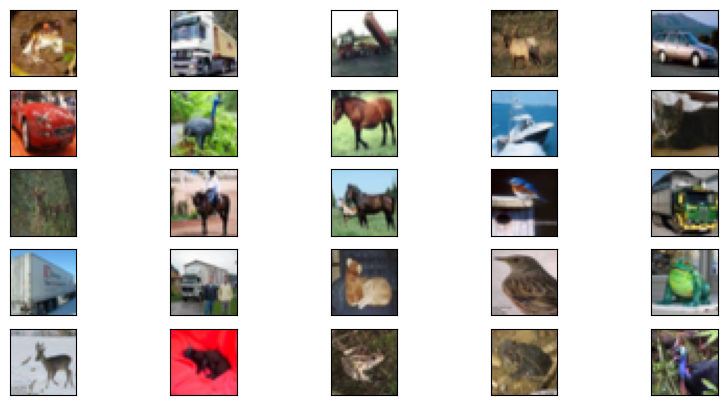

In [6]:


# showing fisrt 25 images from training set using imshow
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [7]:
# convolutional nn model creation

model = keras.Sequential([


    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    # we choosing correct image size (32x32) and using 3 colour channels 
    MaxPooling2D((2,2), strides=2),
    # we make our feature map smaller, actual size - 16x16

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
     # we make our feature map smaller once again, actual size - 8x8



    # full layer NN model creation
    Flatten(),

    Dense(128, activation='relu'), 
    Dense(10, activation = 'softmax')
])

# we may input a NN structure 
print(model.summary())



# 896 - weights FROM first convolutional layer 
# 18496 - weights FROM second convolutional layer 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [8]:
# NN model compiling 

import tensorflow as tf
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [9]:
# loss reduction method

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# This code instantiates the ImageDataGenerator class from the TensorFlow/Keras library
# for image augmentation. Image augmentation is the process of creating
# new image options by applying various transformations
# to the original images. This helps increase the diversity of the training dataset
# and improve the generalization ability of the model.






datagen = ImageDataGenerator(
    rotation_range=15,
    # # Rotate the image at a random angle within ±15 degrees.
    # This helps the model become more robust to rotation of objects in images.
    width_shift_range=0.1,
   # Randomly shift the image horizontally by a fraction of its width,
    # where 0.1 means 10% of the width. This helps the model to learn from objects,
    # located in different horizontal positions.
    height_shift_range=0.1,
   # Randomly vertically shifts the image by a fraction of its height,
    # Same as width_shift_range parameter.
    # This helps the model to learn from objects
    # located in different vertical positions.
    horizontal_flip=True
   # With a 50% chance the image can be horizontally reflected (mirrored).
    # This helps the model to train on objects that are in a mirror position.

)
# apply all parameters to the x_train sample
datagen.fit(x_train)


history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
   1/1563 [..............................] - ETA: 5:47 - loss: 2.3107 - accuracy: 0.0000e+00

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 18s 12ms/step - loss: 1.5125 - accuracy: 0.1019 - val_loss: 1.1782 - val_accuracy: 0.1109
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2145 - accuracy: 0.0978 - val_loss: 1.1052 - val_accuracy: 0.1307
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1052 - accuracy: 0.0999 - val_loss: 0.9933 - val_accuracy: 0.1204
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0403 - accuracy: 0.1012 - val_loss: 0.9366 - val_accuracy: 0.1063
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9917 - accuracy: 0.1008 - val_loss: 0.8921 - val_accuracy: 0.0920
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9565 - accuracy: 0.1004 - val_loss: 0.8595 - val_accuracy: 0.1111
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9199 - accuracy: 0.1018 - val_loss: 0.8947 - val_accura

In [10]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nТочность на тестовых данных:', test_acc)

313/313 - 1s - loss: 0.7636 - accuracy: 0.1085 - 870ms/epoch - 3ms/step

Точность на тестовых данных: 0.10849999636411667


In [11]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.7636 - accuracy: 0.1085


[0.7635870575904846, 0.10849999636411667]

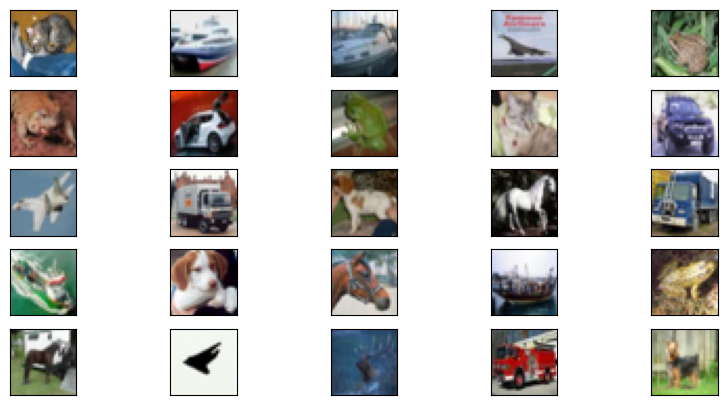

In [12]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)

plt.show()

1/1 [==============================] - 0s 50ms/step
[[8.2278263e-04 1.8774711e-02 4.4729518e-07 1.0316742e-07 1.0268777e-08
  1.6616146e-10 1.5046597e-08 8.7548452e-10 9.8035103e-01 5.0879436e-05]]
Recognized image: Boat


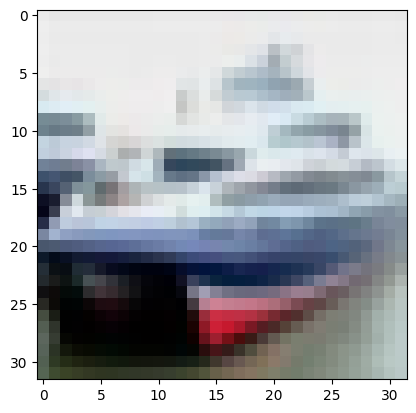

In [13]:
class_names = ['Plane', 'Auto', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Lorry']

n = 3
x = np.expand_dims(x_test[n], axis=0) 
res = model.predict(x)
predicted_class = np.argmax(res)
predicted_class_name = class_names[predicted_class]

print(res)
print(f"Recognized image: {predicted_class_name}")


plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()
